# K nearest neighbour

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
le = LabelEncoder()


In [6]:
df['Sex'] = le.fit_transform(df['Sex'])

In [7]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


# Importing the Knn function

In [9]:
from sklearn import neighbors

In [10]:
y = df['Pclass']


In [11]:
#Droping the irrrelevant features
x = df.drop(['Pclass','PassengerId','Name','Ticket','Cabin'],axis=1)

In [12]:
x.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,1,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,0,1,35.0,0,0,8.0500,2


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
X_train

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
350,0,1,45.0,0,0,35.0000,2
124,1,1,12.0,1,0,11.2417,0
577,0,0,45.0,1,0,14.4583,0
422,0,0,28.0,1,1,14.4000,2
118,0,0,2.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
835,0,1,45.0,0,0,8.0500,2
192,1,1,3.0,1,1,26.0000,2
629,1,1,80.0,0,0,30.0000,2
559,0,1,45.0,0,0,7.7500,1


In [16]:
X_test

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
14,0,0,14.0,0,0,7.8542,2
158,0,1,45.0,8,2,69.5500,2
762,1,0,36.0,1,2,120.0000,2
740,0,1,36.0,1,0,78.8500,2
482,1,0,63.0,0,0,9.5875,2
...,...,...,...,...,...,...,...
619,0,1,27.0,1,0,14.4542,0
820,1,1,27.0,0,0,8.6625,2
64,1,1,45.0,1,1,15.2458,0
882,0,1,25.0,0,0,7.0500,2


In [21]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.fit(X_train,y_train).score(X_test,y_test)

0.8651685393258427

In [23]:
y_pred = knn.predict(X_test)

In [24]:
confusion_matrix(y_test,y_pred)

array([[ 63,   5,   2],
       [  7,  28,  14],
       [  3,   5, 140]], dtype=int64)

In [37]:
accuracy = []

for i in range(1, 267):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    accuracy.append(knn.fit(X_train,y_train).score(X_test,y_test))
    

Text(0, 0.5, 'Accuracy score')

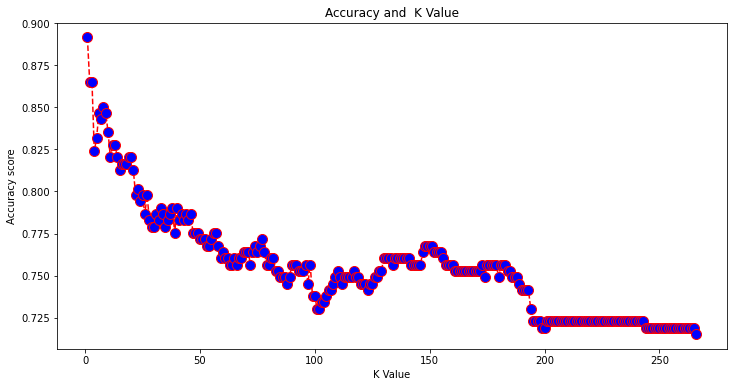

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 267), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy and  K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy score')